----------
Deep learning
------------
`loyiha va uni mahsulotga aylantirish`

Biz bu amaliyotda katta malumotga ega bo'lgan fayllar bilan ishlaymiz.
yaa'ni qiladigan ishimiz `fastai` yordamida model yaratamiz. Biz classlar tanlab olamiz va unga yangi qiymatlar berib ko'ramiz. Bunda biz modelimizni aniq ishlayotganligini tekshirib olamiz.

Misol uchun `car` rasmini berib ko'ramiz: modelimiz bu rasmni tahlil qilib uni mashina yoki mashina emasni va yana nechi foiz aniqligini ham chiqarib beradi.

Kerakli kutubxonalarni o'zimizga mos versiyada yuklab olamiz

In [2]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.14
2.1.0+cu121


Dataset
--------
Bizga kerakli datasetni yuklab olamiz:
`Github` - https://github.com/EscVM/OIDv4_ToolKit
Bu github manzili orqali kerakli fayllarni topa oladigan manzilga borsak bo'ladi.

Endigi navbat faylni ishlatishimiz uchun githubdan yuklab olamiz

In [3]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 35.47 MiB/s, done.
Resolving deltas: 100% (146/146), done.


 ichidan `requirements.txt` faylini ichidan kerakli kutubxonalarni chaqirib olamiz

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

Asosiy `main.py` faylini ichida kerakli bo'limlarini ishlatamiz

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

Endi esa o'zimizga yoqqan classlarni yuklab olamiz va ko'rishimiz ham mumkin:

`Bird`, `Helmet`, `Telephone`

In [7]:
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Bird Helmet Telephone --type_csv train --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bird.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 64463 KB/s, 0 seconds passed
[DOWNLOAD] | File cla

Model
----------

Yana boshqa kutubxonalarni chaqirib olamiz

In [19]:
from fastai.vision.all import *
from ipywidgets import widgets

# path - biz ishlatmoqchi bo'lgan papka haqida malumotni saqlaymiz va ishlatamiz
path = Path('train')

# files - path ni ichida nechta fayl yani rasmlarni yuklab olganligimiz haqida malumot
files = get_image_files(path)
# failed - bu fayni yani biror bir rasmni yuklashda muammo bo'lganda xabar beradi
failed = verify_images(path)

# datablock yaratib olamiz
aralash = DataBlock(
    # CategoryBlock - bu rasmlarimiz kategoriyalarga ajraltish
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    #splitter - bu datamizni train va test setlarga ajratib beradi
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    # parent_label - bu barcha rasmlarimiz uchun tepasiga class nomini yozib ishlatadi
    get_y = parent_label,
    # Resize - bu rasmlarimizni 224x224 o'lchamda to'g'rilab oladi, chunki ko'p modellar shu o'lchamda moslashgan
    item_tfms=Resize(224)
)

# downloaders yaratamiz
dls = aralash.dataloaders(path)

# Endi datasetni tekshirib ko'ramiz
# dls.train.show_batch(max_n=16, nrows=2)

# O'qitish (train) - modelimizni foydaliligini ko'ramiz
# CNNlearner modeli - Convolutional Neural network
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

'PosixPath' object is not iterable


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.028766,0.173535,0.932927,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.184791,0.100565,0.963415,00:11
1,0.127992,0.113798,0.963415,00:12
2,0.095332,0.095456,0.963415,00:11
3,0.067639,0.088270,0.969512,00:11


Endi modelimiz classlardan nechta xato qilganligi bo'yicha malumotlarni matritsa ko'rinishida chiqaramiz

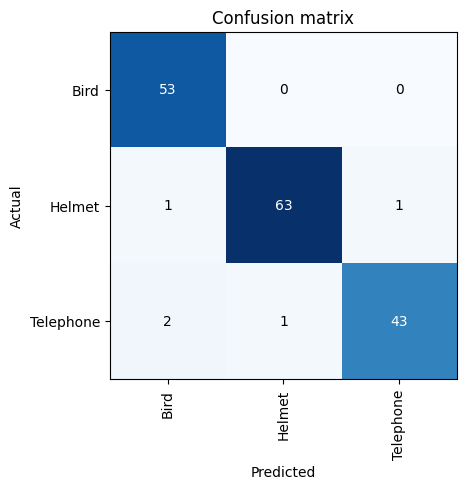

In [20]:
matritsa = ClassificationInterpretation.from_learner(learn)
matritsa.plot_confusion_matrix()

Tepada chiqqan to'rtburchakli matritsada bilishimiz mumkinki,

`Bird` - hammasini to'g'ri bashorat qilgan,

`Helmet` - 1 marta `Bird`, 1 marta `Telephone` deb xato bashorat qilgan,

`Telephone` - 2 marta `Bird`, 1 marta `Helmet` deb xato bashorat qilgan

-------------

Endi xato bashorat qilgan rasmlarni ko'rishimiz mumkin.

1-rasmda telephoneni qushu deb predict qilgan.

2-rasmda esa itni dubulg'a deb qarab tursak, uni qush o'ylagan.

3-rasmda telephoneni qush deb pridect qilgan.

4-rasmda esa o'yinchoqni boshidagi dubulg'a(kaska)ni umumiy telephone deb o'ylagan

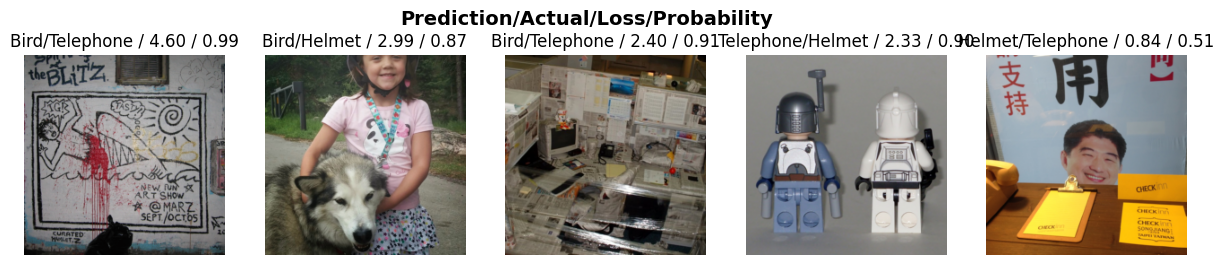

In [25]:
matritsa.plot_top_losses(5, nrows=1)

----------

Endi esa biz yaratgan modelimizga o'zimiz yangi narsani berib ishlatib ko'ramiz.
Bunda shu classga tegishli biror rasmni `upload` qilib tekshirib ko'ramiz

In [41]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Biz hozir multfim qahramonini rasmni berdik.
U bizga `Helmet` deb aniqligini esa deyarli `100 %` deb aniqlab pradict qilib berdi.

Chunki Bu rasmni bosh qaramonni boshida bosh kiyim bor , uni dubulg'a(ya'ni kaska) o'rnida ham bo'laveradi

Bashorat -> Helmet
Aniqlilik ehtimolligi -> 99.8 %


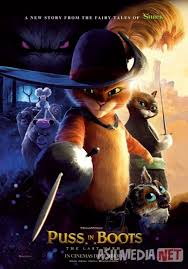

In [42]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)

print(f"Bashorat -> {pred}")
print(f"Aniqlilik ehtimolligi -> {probs[pred_id] * 100:.1f} %")
img